In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_toolbox.math_helper import compute_fft
from analysis_toolbox.ephys_helper import ephys

In [7]:
from fish.ephys.ephys import load, windowed_variance, estimate_swims

In [20]:
ep_file = '/mnt/e/jing/ephys/20191022/ls2-noise-check_fish-water_in-position_exp02.10chFlt'
ep_rate = 6000

In [34]:
spim1_file = '/mnt/e/jing/ephys/20191022/blank.10chFlt'

In [35]:
ep = load(ep_file)
spim1 = load(spim1_file)

In [37]:
ch1 = ep[0,:]
ch2 = ep[1,:]

spim1_ch1 = spim1[0,:]
spim1_ch2 = spim1[1,:]

(0, 300)

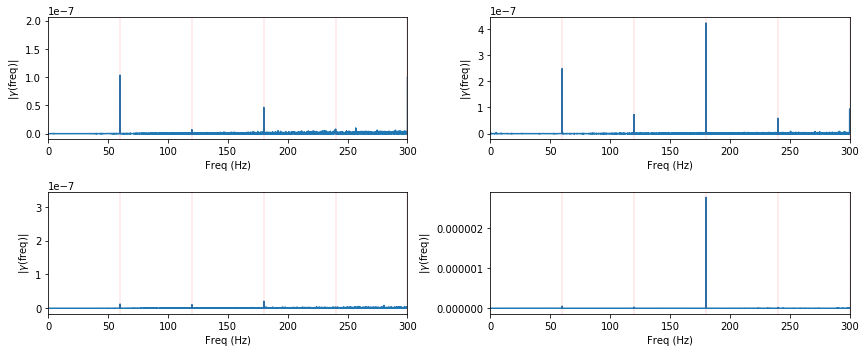

In [40]:
Y1, angle1, frq1 = compute_fft(ch1, ep_rate)
Y2, angle2, frq2 = compute_fft(ch2, ep_rate)

spim1_Y1, spim1_angle1, spim1_frq1 = compute_fft(spim1_ch1, ep_rate)
spim1_Y2, spim1_angle2, spim1_frq2 = compute_fft(spim1_ch2, ep_rate)

In [46]:
ymax = np.max(np.concatenate((abs(spim1_Y1)[1:],abs(spim1_Y2)[1:],abs(Y1)[1:],abs(Y2)[1:]))) * 1.5

(-1.3822869342653994e-07, 4.146860804807264e-06)

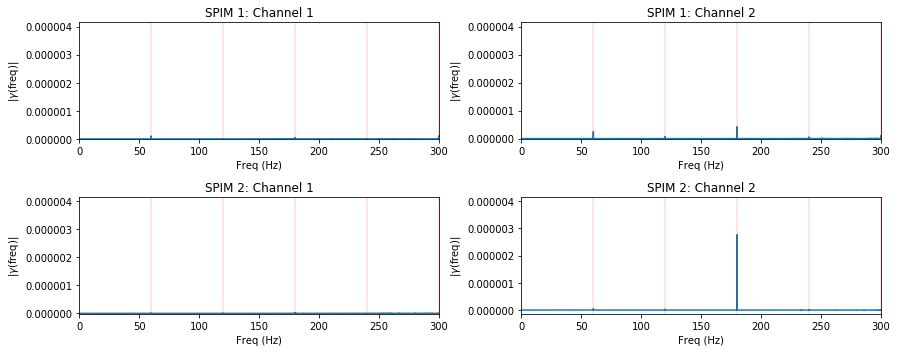

In [47]:
fft_fig, fft_ax = plt.subplots(2,2,figsize=(12,5))

fft_ax[0,0].plot(spim1_frq1[1:],abs(spim1_Y1)[1:])
fft_ax[0,1].plot(spim1_frq2[1:],abs(spim1_Y2)[1:])
fft_ax[1,0].plot(frq1[1:],abs(Y1)[1:])
fft_ax[1,1].plot(frq2[1:],abs(Y2)[1:])

fft_ax[0,0].set_xlabel('Freq (Hz)')
fft_ax[0,1].set_xlabel('Freq (Hz)')
fft_ax[1,0].set_xlabel('Freq (Hz)')
fft_ax[1,1].set_xlabel('Freq (Hz)')

fft_ax[0,0].set_ylabel(r'|$\gamma$(freq)|')
fft_ax[0,1].set_ylabel(r'|$\gamma$(freq)|')
fft_ax[1,0].set_ylabel(r'|$\gamma$(freq)|')
fft_ax[1,1].set_ylabel(r'|$\gamma$(freq)|')

for i in range(60,int(frq1[1:].max()),60):
    fft_ax[0,0].axvline(x=i, color='r', linewidth=0.2)
    fft_ax[0,1].axvline(x=i, color='r', linewidth=0.2)
    fft_ax[1,0].axvline(x=i, color='r', linewidth=0.2)
    fft_ax[1,1].axvline(x=i, color='r', linewidth=0.2)

fft_ax[0,0].set_title('SPIM 1: Channel 1')
fft_ax[0,1].set_title('SPIM 1: Channel 2')
fft_ax[1,0].set_title('SPIM 2: Channel 1')
fft_ax[1,1].set_title('SPIM 2: Channel 2')
    
fft_fig.tight_layout()
fft_ax[0,0].set_xlim(0,300)
fft_ax[0,1].set_xlim(0,300)
fft_ax[1,0].set_xlim(0,300)
fft_ax[1,1].set_xlim(0,300)

fft_ax[0,0].set_ylim(top=ymax)
fft_ax[0,1].set_ylim(top=ymax)
fft_ax[1,0].set_ylim(top=ymax)
fft_ax[1,1].set_ylim(top=ymax)